In [29]:
%load_ext autoreload
%autoreload
import pandas as pd
import numpy as np
from AMAP import AMAP
from DataSetFactory import DataSetFactory
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def vis_2d(_df, _x, _y, _color, _algo):
    fig = px.scatter(_df, x=_x, y=_y, color=_color)
    fig.update_layout(title=f'{_algo}: 2D Visualization')
    fig.show()

In [32]:
# ds = DataSetFactory.get_dataset('fists_no_overlap')
# ds = DataSetFactory.get_dataset('cross')
# ds = DataSetFactory.get_dataset('simple_overlap')
# ds = DataSetFactory.get_dataset('dense_in_sparse')
# ds = DataSetFactory.get_dataset('MNIST')
# ds = DataSetFactory.get_dataset('MNIST64')
ds = DataSetFactory.get_dataset('MNIST64_038')
# ds = DataSetFactory.get_dataset('hourglass')
# ds.df = ds.df.sample(frac=0.10)

In [ ]:
# Shufle data


AMAP
addr:@eedfc8
verbose=True
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.01
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
reduce_all_points=False
uniform_points_per='label'
k=20
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=0
loss_func=<function AMAP.mse_loss at 0x000002D80496BEE8>
loss='mse'
learning_rate=0.1
random_points_in_box=False
class_to_label=None
random_state=42
n_jobs=None
dataset='default'
show_fig=True
save_fig=True
is_plotly=False
do_animation=True
use_spline=False
alpha=1
output_dir='./plots/default/2020-03-03_09-15-32/'
num_clusters_each_label=[]
X_with_centroids=None
y_with_centroids=None
clusters=None
intra_class_anchors=None
intra_class_anchors_labels=None
intra_class_anchors_indices=None
anchors_indices=None
low_dim_anchors=None
low_dim_points=None
knng=None
inter_class_relations=None
inter_class

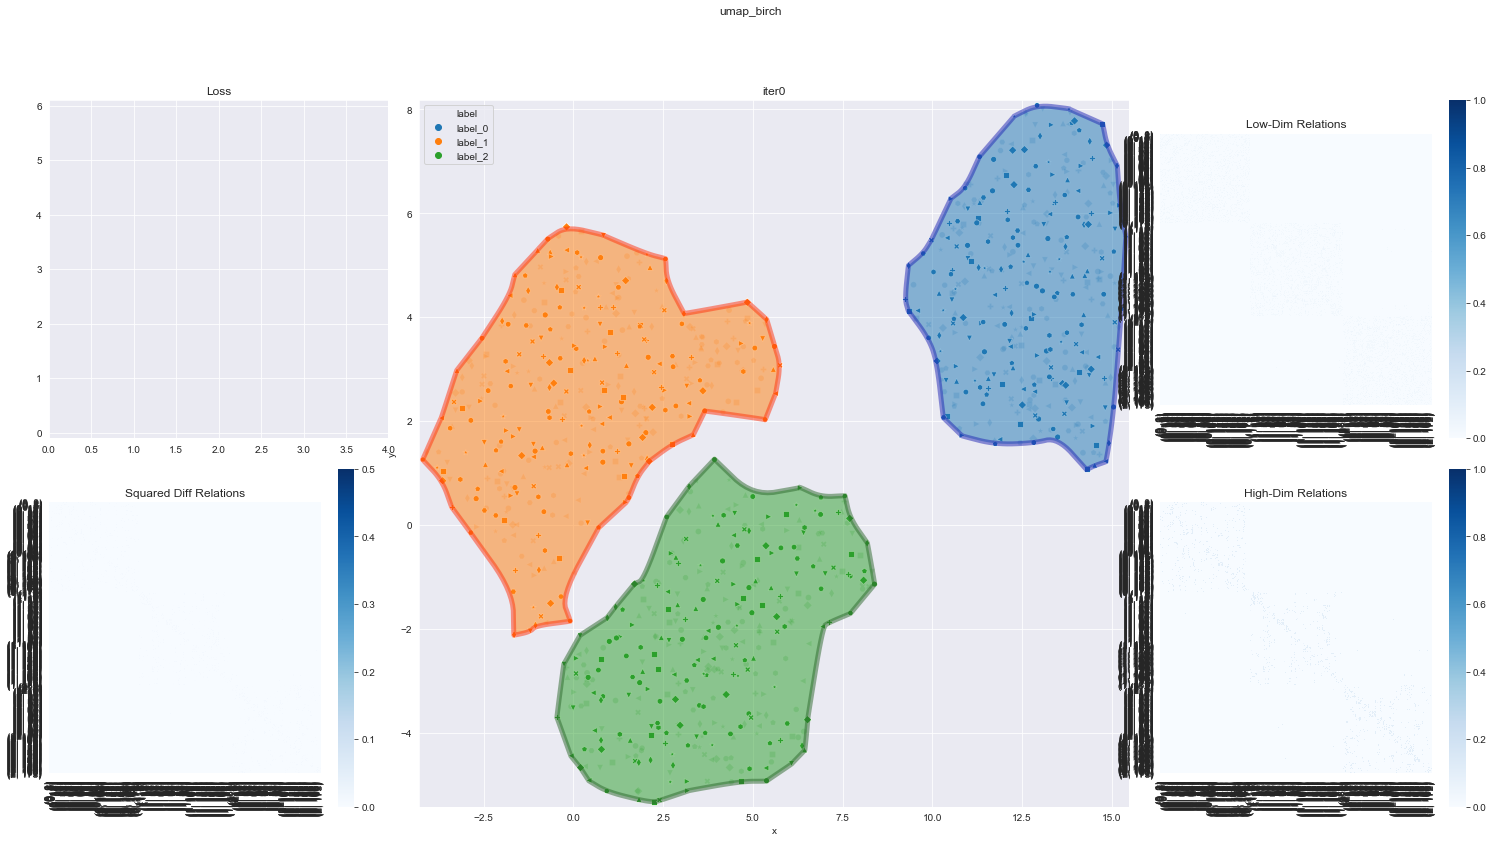

In [34]:
n_iter = 1
amap = AMAP(anchors_method='birch', learning_rate=0.1, 
            n_iter=n_iter, batch_size=0,
            random_state=42, stop_criteria=0,
            uniform_points_per='label', radius_q=None,
            birch_threshold=0.01)
print(amap)
low_dim = amap.fit_transform(ds.df[ds.feature_cols].values, ds.df[ds.label_col].values)

# import imageio
# gif_path = './relaxation_images/animation.gif'
# frames_path = ""
# with imageio.get_writer(gif_path, mode='I') as writer:
#     for i in range(n_iter):
#         for j in range(5):
#             writer.append_data(imageio.imread(f'./relaxation_images/iter{i}.png'))

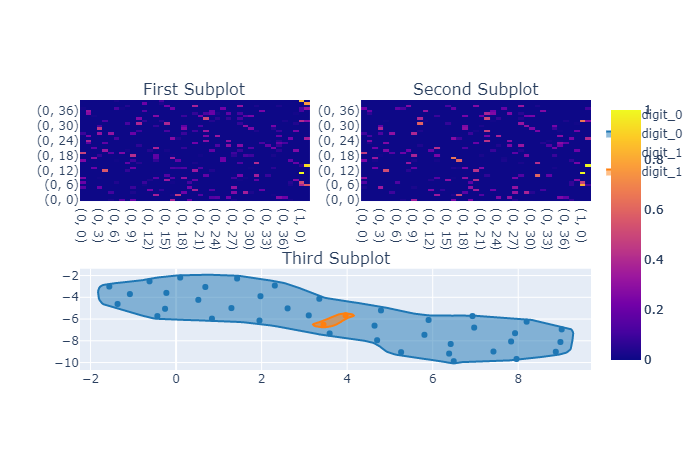

In [25]:
amap.radius_q = 1
amap.anchors_plot_plotly(0)

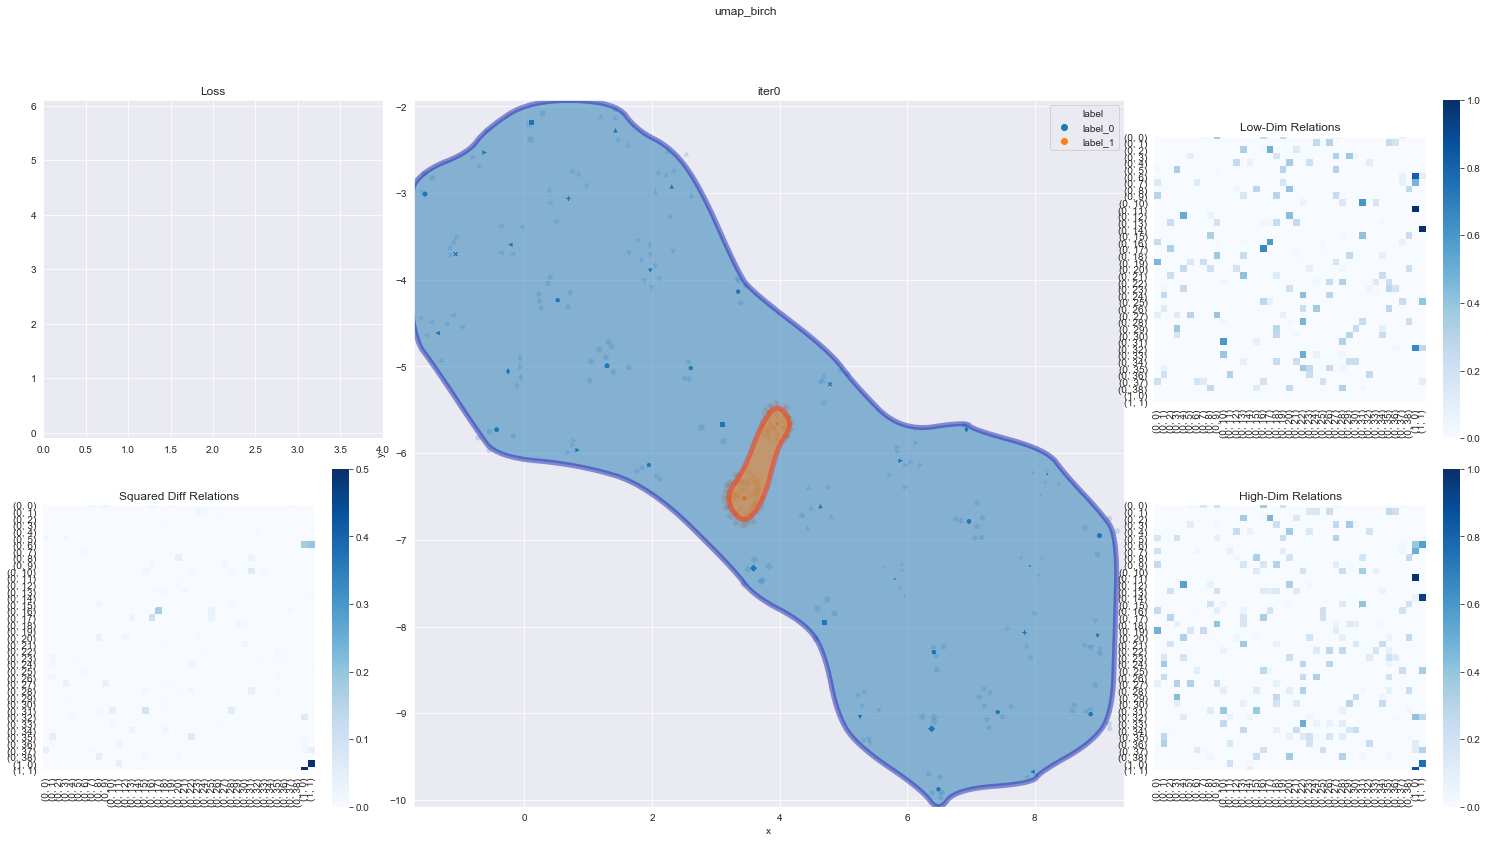

In [26]:
amap.radius_q = 1
amap.anchors_plot_sns(0, True)

In [ ]:
from sklearn import datasets
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)

In [ ]:
import plotly.express as px
df = pd.DataFrame(X)
df.columns = ['x', 'y', 'z']
df['label'] = color
df['label'] = df['label'].astype(int)
fig = px.scatter_3d(df, x='x', y='y', z='z', color='label')
fig.show()

In [ ]:

# /* correct way to generate points uniformly in a 2-D circular region (ball) */
# data Ball(drop=radius twopi);
# call streaminit(12345);
# radius = 2;                                /* use circle of radius 2 */
# twopi = 2 * constant("PI");
# do i = 1 to 1000;                          /* simulate 1000 points */
#    theta = twopi * rand("uniform");        /* angle is uniform */
#    r = radius * sqrt( rand("uniform") );   /* radius proportional to sqrt(U), U~U(0,1) */
#    x = r*cos(theta);
#    y = r*sin(theta);
#    output;
# end;
# run;


num_samples = 1000

# make a simple unit circle 
radius = 8
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = radius * np.cos(theta), radius * np.sin(theta)

# generate the points
theta = np.random.rand((num_samples)) * (2 * np.pi)
r = radius * np.sqrt(np.random.rand((num_samples)))
x, y = r * np.cos(theta), r * np.sin(theta)

# plots
plt.figure(figsize=(7,6))
plt.plot(a, b, linestyle='-', linewidth=2, label='Circle')
plt.plot(x, y, marker='o', linewidth=0, label='Samples')
# plt.ylim([-1.5,1.5])
# plt.xlim([-1.5,1.5])
plt.grid()
plt.legend(loc='upper right')
plt.show(block=True)

In [ ]:
np.array(list(zip(x, y)))